In [31]:
#importamos las librerias necesarias
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(suppress=True)

In [32]:
#cargamos la tabla
data3 = pd.read_csv (r'fifa19.csv')
#cambiamos los valores vacíos, 0 o interrogaciones por 'missing values'
data3

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [33]:
#Mostramos el número de filas y columnas inicial
data3.shape

(18207, 89)

# Limpieza de datos

In [34]:
#Mostramos todas las columnas para posteriormente selecionar las que vayamos a usar
data3.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [35]:
#Selecionamos las columnas que queremos usar
Columnas= ['Age', 'Nationality',
       'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position',
       'Joined', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

#xk son url, no relacion, demasiados nulls
#.isnull.sum .unique
#df.isnull().sum().sum()

In [36]:
nuevo = data3[Columnas] 
nuevo.shape #Mostramos el número de filas y columnas que tenemos

(18207, 79)

In [37]:
nuevo.isnull().sum() #Vemos si hay valores nulos

Age                  0
Nationality          0
Overall              0
Potential            0
Club               241
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 79, dtype: int64

In [38]:
nuevo1 = nuevo.dropna()#Quitamos las filas con valores nulos
#Al hacer dropna se quitan las filas directamente. No se actualiza el número de fila 
#Por lo tanto hay que resetrarlo
nuevo1 = nuevo1.reset_index(drop = True) 
nuevo1.isnull().sum() #Comprobamos que no quedan valores nulos

Age               0
Nationality       0
Overall           0
Potential         0
Club              0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 79, dtype: int64

In [39]:
nuevo1 #Mostramos la tabla final

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
14739,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
14740,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,1.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
14741,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,1.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [40]:
nuevo1.shape #Mostramos las filas y columnas que nos quedan

(14743, 79)

## Categorización de columnas

In [41]:
#Categorizamos los datos de las columnas
nuevo1['Nationality'] = nuevo1['Nationality'].astype('category').cat.codes.astype('int64').values
nuevo1['Position'] = nuevo1['Position'].astype('category').cat.codes.astype('int64').values
nuevo1['Preferred Foot'] = nuevo1['Preferred Foot'].astype('category').cat.codes.astype('int64').values
nuevo1['Club'] = nuevo1['Club'].astype('category').cat.codes.astype('int64').values
nuevo1['Work Rate'] = nuevo1['Work Rate'].astype('category').cat.codes.astype('int64').values

## Normalización de columnas

In [42]:
#Cambiamos las comas por puntos
nuevo1['Height'] = nuevo1['Height'].str.replace("'", '.')

#Nos quedamos con el valor numérico y para ello, quitamos 'lbs' de los elementos de la columna
nuevo1['Weight'] = nuevo1['Weight'].str[:-3]

#Para la fecha, nos quedamos solo con el año
nuevo1['Joined'] = nuevo1['Joined'].str[-4:]

#Para las cantidades de dinero nos quedamos con todo menos el primer elemento ($) y el último (M/K),
#es decir, nos quedamos con el valor numérico
nuevo1['Release Clause'] = nuevo1['Release Clause'].str[1:-1]
nuevo1['Wage'] = nuevo1['Wage'].str[1:-1]
nuevo1['Value'] = nuevo1['Value'].str[1:-1]

lista = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

#Como los valores de la columna son sumas de dos números, los sumamos para despues poder trabajar con ellos
for elemento in lista:
    nuevo1[elemento] = nuevo1[elemento].str[:2].astype('int64') + nuevo1[elemento].str[-1:].astype('int64')
    

In [43]:
nuevo1

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,6,94,94,212,110.5,565,2202,0,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,33,120,94,94,326,77,405,2228,1,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,26,20,92,93,435,118.5,290,2143,1,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,27,13,91,92,374,102,355,2281,1,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
4,27,13,91,91,134,93,340,2142,1,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19,46,47,65,165,60,1,1307,1,1.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143
14739,19,140,47,63,587,60,1,1098,1,1.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113
14740,16,46,47,67,122,60,1,1189,1,1.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165
14741,17,46,47,66,586,60,1,1228,1,1.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143


# 3.1 ESTANDARIZACIÓN Y NORMALIZACIÓN DE DATOS 

In [44]:
from sklearn.preprocessing import StandardScaler #importo StandardScaler de la librería scikit-learn
#transformamos y normalizamos los datos
ss = StandardScaler()
trans = ss.fit_transform(nuevo1)
pd.DataFrame(data=trans)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,1.281161,-1.479717,4.008604,3.716223,-0.599255,-0.555333,24.306689,2.702343,-1.750655,9.688745,...,3.488529,-1.075594,-1.263559,-1.249342,-1.453067,0.142978,1.411989,1.128794,-0.807765,0.005189
1,1.716492,0.973882,4.008604,3.716223,0.006800,-0.669890,17.299473,2.833543,0.571215,9.688745,...,3.390798,-1.366850,-1.106368,-1.406571,-1.130433,0.142978,1.411989,1.128794,0.158917,-0.324320
2,0.192833,-1.178398,3.718317,3.552260,0.586275,-0.527977,12.263037,2.404620,0.571215,9.688745,...,3.293067,-1.425101,-1.473147,-0.882477,-0.485165,-0.506212,1.411989,1.453982,0.158917,0.010493
3,0.410498,-1.329057,3.573174,3.388298,0.261982,-0.584400,15.109718,3.100989,0.571215,7.193528,...,2.706681,0.963197,0.308351,0.060891,1.450638,0.792167,-1.768552,-0.171957,0.803372,-0.094592
4,0.410498,-1.329057,3.573174,3.224336,-1.013925,-0.615177,14.452792,2.399574,0.571215,7.193528,...,2.999874,-1.017343,-1.315956,-1.458980,0.160102,0.467572,-1.450498,-0.822333,-0.807765,-0.175146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,-1.330827,-0.618805,-2.813146,-1.038679,-0.849120,-0.728024,-0.393746,-1.813961,0.571215,-0.292121,...,-1.495757,-0.667836,-0.215619,-0.148746,-0.162531,0.792167,-1.132443,-0.822333,-0.485538,-0.271612
14739,-1.330827,1.404338,-2.813146,-1.366603,1.394349,-0.728024,-0.393746,-2.868606,0.571215,-0.292121,...,-1.788951,-1.716357,-1.944720,-1.616208,-0.162531,-0.506212,-0.496335,-1.797896,0.481144,-0.371061
14740,-1.983824,-0.618805,-2.813146,-0.710755,-1.077720,-0.728024,-0.393746,-2.409407,0.571215,-0.292121,...,-1.886682,-1.133845,-2.049514,-2.035483,-1.453067,-1.804590,-0.178281,-1.472708,0.803372,-0.198682
14741,-1.766158,-0.618805,-2.813146,-0.874717,1.389033,-0.728024,-0.393746,-2.212607,0.571215,-0.292121,...,-1.398026,-1.832859,-1.420750,-1.196933,1.128004,-1.479996,1.093935,-0.822333,-0.485538,-0.271612


# 3.2 AUTOVALORES Y AUTOVECTORES

In [45]:
# Calculamos la matriz de covarianza
dataC = np.cov(trans.T)
dataC

array([[ 1.00006783, -0.03724951,  0.4648754 , ...,  0.07694033,
         0.07803336, -0.04173011],
       [-0.03724951,  1.00006783, -0.01548369, ...,  0.00474152,
        -0.00829363, -0.00194115],
       [ 0.4648754 , -0.01548369,  1.00006783, ...,  0.04214166,
         0.04338141, -0.41730688],
       ...,
       [ 0.07694033,  0.00474152,  0.04214166, ...,  1.00006783,
         0.08853477, -0.01557789],
       [ 0.07803336, -0.00829363,  0.04338141, ...,  0.08853477,
         1.00006783, -0.00196931],
       [-0.04173011, -0.00194115, -0.41730688, ..., -0.01557789,
        -0.00196931,  1.00006783]])

In [46]:
dataC.shape #es una matriz cuadrada

(79, 79)

In [47]:
# obtenemos los autovalores
eig_vals, eig_vecs = np.linalg.eig(dataC) 

print('Eigenvectors \n%s' %eig_vecs.real)
print('\nEigenvalues \n%s' %eig_vals.real)


Eigenvectors 
[[ 0.06258021 -0.07136874  0.17634013 ... -0.         -0.
   0.        ]
 [ 0.0010043  -0.00106406 -0.01652616 ... -0.         -0.
  -0.        ]
 [ 0.14242005 -0.08450376  0.13514572 ... -0.         -0.
   0.        ]
 ...
 [ 0.0065273  -0.00924286  0.02419124 ... -0.         -0.
   0.        ]
 [ 0.00604085 -0.00754509  0.02536814 ... -0.         -0.
   0.        ]
 [-0.0661478   0.02091491 -0.0455678  ...  0.          0.
   0.        ]]

Eigenvalues 
[30.35213325 16.16146208  4.34120515  2.26954513  1.927664    1.34181788
  1.28696095  1.1316742   1.04450158  1.01242658  0.98621603  0.94705068
  0.93178922  0.8829467   0.89673107  0.91209083  0.91429084  0.82410521
  0.84256421  0.7414171   0.69016447  0.71571407  0.65145922  0.59618719
  0.53380462  0.47900989  0.50199745  0.41327653  0.40155936  0.33823362
  0.29574545  0.31699312  0.30967367  0.27260639  0.25217935  0.24680255
  0.22362604  0.21872375  0.19426361  0.20347988  0.14928544  0.17330555
  0.17195081  0.1

In [48]:
#DataFrame con el porcentaje de varianza por cada componente
# para el porcentaje de varianza, realizamos una regla de tres, calculando previamente el sumatorio de los valores del vector

print('Porcentaje de varianza \n')
suma = sum(eig_vals) 
num2 = eig_vals*100/suma
num2.real

Porcentaje de varianza 



array([38.41781582, 20.45615933,  5.49482366,  2.87264707,  2.43991551,
        1.69838843,  1.628954  ,  1.43240182,  1.32206421,  1.28146571,
        1.24829005,  1.19871701,  1.17940002,  1.11757824,  1.13502563,
        1.15446705,  1.15725167,  1.0431004 ,  1.06646463,  0.938439  ,
        0.87356665,  0.90590572,  0.82457599,  0.75461614,  0.67565622,
        0.6063005 ,  0.63539671,  0.52309937,  0.50826851,  0.42811478,
        0.37433594,  0.4012299 ,  0.3919654 ,  0.34504798,  0.31919271,
        0.31238709,  0.28305174,  0.27684673,  0.24588663,  0.257552  ,
        0.18895609,  0.21935923,  0.21764449,  0.18077776,  0.11360476,
        0.13536062,  0.10330975,  0.05752639,  0.19899481,  0.1463472 ,
        0.14771995,  0.04034972,  0.00349807,  0.00332553,  0.00287753,
        0.00097815,  0.00008912,  0.00160819,  0.00194841,  0.00250563,
        0.0023343 ,  0.00213159,  0.00238675,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.  

In [49]:
#Porcentaje acumulado por cada componente
print('Porcentaje acumulado por cada componente: \n')
num2 = num2.cumsum()
num2.real
    

Porcentaje acumulado por cada componente: 



array([ 38.41781582,  58.87397515,  64.36879881,  67.24144589,
        69.6813614 ,  71.37974983,  73.00870383,  74.44110564,
        75.76316986,  77.04463557,  78.29292562,  79.49164263,
        80.67104265,  81.78862089,  82.92364652,  84.07811357,
        85.23536524,  86.27846564,  87.34493027,  88.28336927,
        89.15693592,  90.06284164,  90.88741763,  91.64203377,
        92.31768999,  92.92399049,  93.5593872 ,  94.08248657,
        94.59075508,  95.01886986,  95.39320579,  95.79443569,
        96.18640109,  96.53144906,  96.85064178,  97.16302887,
        97.44608061,  97.72292734,  97.96881396,  98.22636596,
        98.41532206,  98.63468129,  98.85232578,  99.03310354,
        99.1467083 ,  99.28206892,  99.38537867,  99.44290505,
        99.64189987,  99.78824706,  99.93596701,  99.97631673,
        99.9798148 ,  99.98314034,  99.98601786,  99.98699601,
        99.98708513,  99.98869332,  99.99064173,  99.99314736,
        99.99548166,  99.99761325, 100.        , 100.  

In [50]:
#explicar qué quieren decir estos datos y cómo se relacionan con los datos 

# 3.3 REPRESENTAR GRÁFICAMENTE

In [55]:
Componente1 = eig_vecs[0]
print(Componente1.real)

Componente2 = eig_vecs[1]
print(Componente2.real)

dfComp = pd.DataFrame()
dfComp['C1'] = Componente1.real
dfComp['C2'] = Componente2.real
dfComp

[ 0.06258021 -0.07136874  0.17634013 -0.22656555  0.30127077 -0.24024174
  0.01822763 -0.1100685   0.13330735 -0.0411851   0.04524844  0.06626138
  0.02094161 -0.02624118 -0.00876974  0.00766899  0.00308031 -0.00514229
  0.00136897  0.07576113  0.47896289  0.03082916 -0.0682367   0.15155417
  0.06126155 -0.16232633  0.00455772  0.11600967  0.04476194  0.11685856
 -0.03876287 -0.01199802  0.02692844  0.02605171 -0.10179667  0.09958174
  0.05318217 -0.02052513  0.07236883  0.00123877 -0.35344963  0.21240794
 -0.01668073 -0.15957142 -0.05055414  0.06051367 -0.03491282  0.37110901
 -0.02869539 -0.12067566 -0.08810531 -0.03941066  0.00090444 -0.00024651
  0.00121843  0.0004892   0.00030993  0.00013319 -0.00100732 -0.00026868
 -0.00059756 -0.00003875 -0.00000901  0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
  0.        ]
[ 0.0010043  -0.00106406 -0.01652616 -0.05493416 -0.01995193 

,C1,C2
0,6.258021e-02,1.004295e-03
1,-7.136874e-02,-1.064056e-03
2,1.763401e-01,-1.652616e-02
3,-2.265655e-01,-5.493416e-02
4,3.012708e-01,-1.995193e-02
...,...,...
74,1.468728e-15,1.351323e-16
75,-5.620778e-16,4.123306e-16
76,-4.323315e-16,-3.774031e-17
77,-4.323315e-16,-3.774031e-17


In [66]:
#Ahora tengo que multiplicar C1(0) * trans(0,0), C1(0) * trans(0,1)... etc
#Si lo hago con un bucle for me muero asi que voy a multiplicar matrices
#Mi Matriz de Componentes es 79x2 y mi matriz de datos es de 14xxx x 79
#Como quiero una matriz de 2x14xxx, multiplico trans * Componentes
datitos = trans.dot(dfComp)
dfDatitos = pd.DataFrame(data=datitos)
dfDatitos

,0,1
0,3.065311,-2.927390
1,3.088059,-4.028673
2,3.065841,-4.762600
3,2.901927,-3.695102
4,2.842512,-3.013742
...,...,...
14738,-1.423155,-0.573415
14739,-0.541574,-0.514402
14740,-1.537556,-1.126949
14741,-0.609025,-1.117963


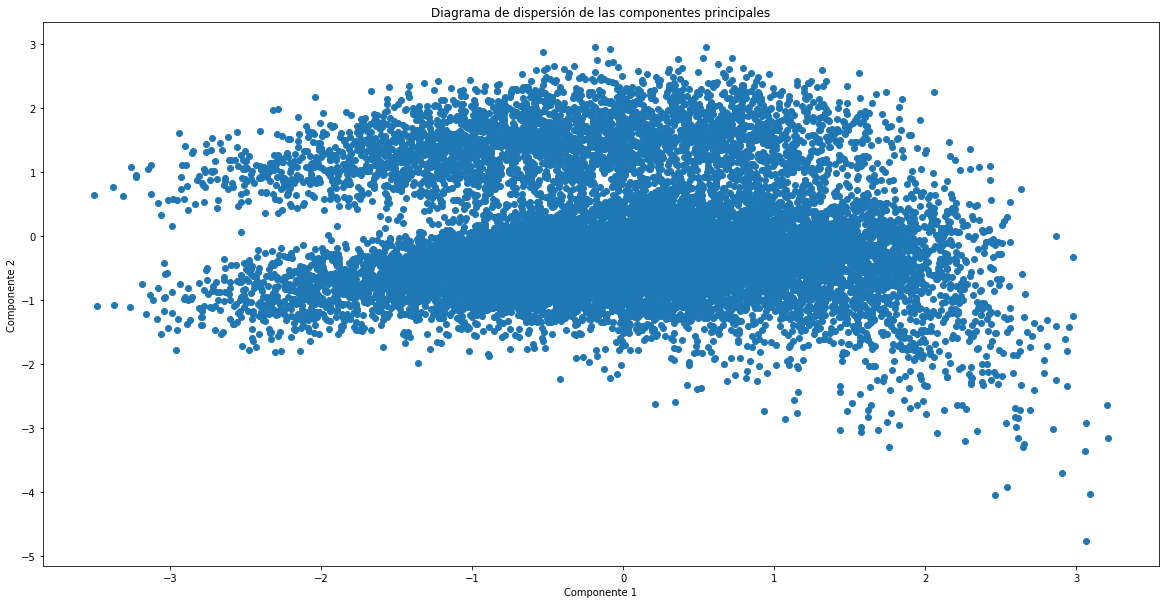

In [70]:
#Pinto los datos
#Los valores de X son los de la C1
x = dfDatitos[0]
#Los valores de Y son los de la C2
y = dfDatitos[1]
fig, ax = plt.subplots(figsize=(20, 10))

# labels
plt.title('Diagrama de dispersión de las componentes principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Diagrama de dispersión (porcentajes de varianza y acumulado)
plt.scatter(x, y)
plt.show()

In [114]:
# interpretacion del resultado, con info del eje X y eje Y

In [115]:
# 4 individuos

# 3.4 USANDO LIBRERÍA SCIKIT-LEARN

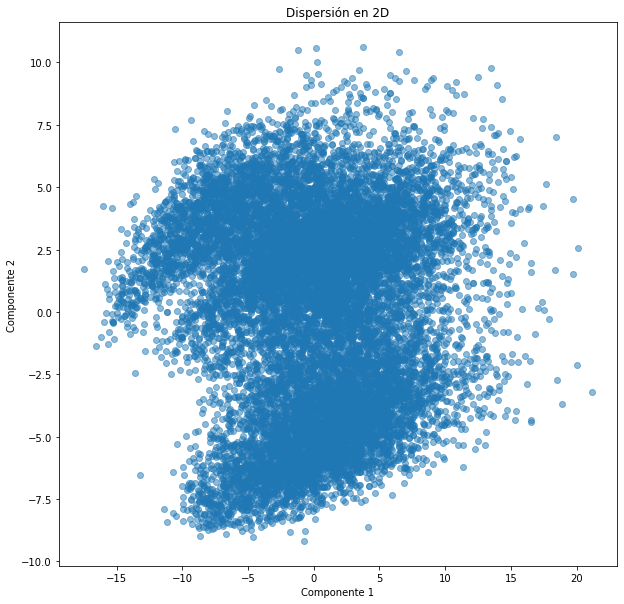

In [75]:
pca = PCA(n_components=2)

componentes = pca.fit_transform(trans)
df_comp = pd.DataFrame(data = componentes, columns = ['C1','C2'])

t_fin_PCA = pd.concat([data3.iloc[:,[1]],df_comp], axis = 1)

fig2, ax2 = plt.subplots(figsize=(10, 10)) #Creación del gráfico
ax2.set_xlabel('Componente 1')
ax2.set_ylabel('Componente 2')
ax2.set_title('Dispersión en 2D')

plt.scatter(t_fin_PCA["C1"],t_fin_PCA["C2"],alpha = 0.5)
plt.show()